# Project 3: Collaborative Filtering
Jake Turelli | 4 May 2018 | UCLA Masters Program

## Overview
The two basic models for recommender systems work with two kinds of data: 
1. User-Item interactions such as ratings
2. Attribute information about the users and items such as textual profiles or relevant keywords.

Models that use type 1 data are referred to as collaborative filtering methods, whereas models that use type 2 data are referred to as content based methods. In this prjoect, we will build a recommendation system using collaboratiev filtering methods. 

## Collaborative Filtering Models
Two collaborative filtering methods will be implemented and the performance analyzed: 
1. Neighborhood-based collaborative filtering
2. Model-based collaborative filtering

We will denote the ratings matrix, R which is an (m x n) matrix containing m users (rows) by n movies (cols). The entry of the matrix is the ratin gof user i for movie j and is denoted by rij. 

## MovieLens Dataset
For this project, the MovieLens dataset is used and can be found at the following location: 
http://files.grouplens.org/datasets/movielens/ml-latest-small.zip


### Extract CSV Data using Pandas
Pandas library conveniently allows us to bring in the csv data as Dataframes.

In [2]:
import pandas as pd
import os
wdir = "C:\\Users\\Kacy\\Documents\\Jake\\Jake Masters\\07 Data Mining\\Data-Mining\\Project 3\\ml-latest-small"
links   = pd.read_csv(os.path.join(wdir, "links.csv"))
movies  = pd.read_csv(os.path.join(wdir, "movies.csv"))
ratings = pd.read_csv(os.path.join(wdir, "ratings.csv"))
tags    = pd.read_csv(os.path.join(wdir, "tags.csv"))
print('links:')
print(list(links))
print(links.shape)
#print(links[:3])
print('-'*20)
print('movies:')
print(list(movies))
print(movies.shape)
#print(movies[:3])
print('-'*20)
print('ratings:')
print(list(ratings))
print(ratings.shape)
#print(ratings[:3])
print('-'*20)
print('tags:')
print(list(tags))
print(tags.shape)
#print(tags[:3])
print('-'*20)

links:
['movieId', 'imdbId', 'tmdbId']
(9125, 3)
--------------------
movies:
['movieId', 'title', 'genres']
(9125, 3)
--------------------
ratings:
['userId', 'movieId', 'rating', 'timestamp']
(100004, 4)
--------------------
tags:
['userId', 'movieId', 'tag', 'timestamp']
(1296, 4)
--------------------


### Question 1
Compute the sparsity of the movie rating dataset, where sparsity is defined by equation 1: 

Sparsity = Total number of available ratings / Total number of possible ratings


In [90]:
mUsers = len(np.unique(ratings.userId))
nMovies = movies.shape[0]
available = ratings.shape[0]
possible = mUsers*nMovies
sparsity = available/possible

print('m users  = %d'% mUsers)
print('n movies = %d'% nMovies)
print('available ratings = %d' % available)
print('possible ratings  = %d' % possible)
print('Sparsity          = %f' % sparsity )

m users  = 671
n movies = 9125
available ratings = 100004
possible ratings  = 6122875
Sparsity          = 0.016333


### Question 2
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

max rating = 5.000000
min rating = 0.500000
unique ratings:
[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5. ]


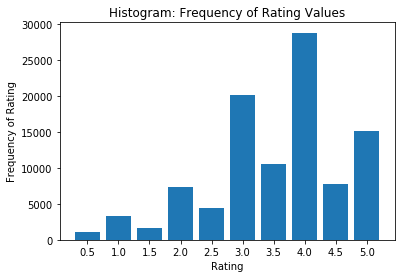

In [47]:
import numpy as np
from matplotlib import pyplot as plt
#print(ratings[:20])
print('max rating = %f' % np.max(ratings.rating))
print('min rating = %f' % np.min(ratings.rating))
unique_ratings = np.unique(ratings.rating)
print('unique ratings:')
print(unique_ratings)
bin_range = np.arange(np.min(unique_ratings)-.25, np.max(unique_ratings) + 0.75, 0.5)
[hist,bins] = np.histogram(ratings.rating, bins=bin_range)
plt.bar(unique_ratings,hist, width = 0.4)
plt.title('Histogram: Frequency of Rating Values')
plt.xticks(unique_ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency of Rating')
plt.show()

As we can see, the histogram is skewed towards higher ratings, with a clear dominant rating of 4.0. Furthermore, frequency of integer ratings are significantly higher than half ratings. 

### Question 3
Plot the distribution of ratings among movies. 

In [69]:
movie_ratings_freq = np.zeros((nMovies,1))

for i in range(nMovies):
    ind = ratings.movieId == movies.movieId[i]
    movie_ratings_freq[i] = len(ratings.movieId[ind])

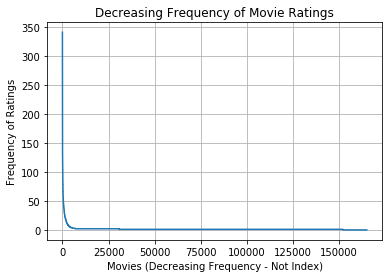

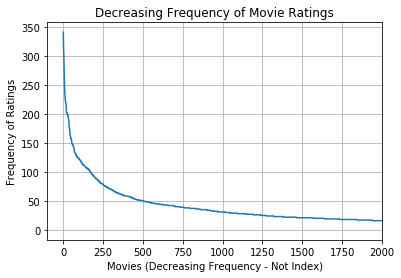

In [96]:
ind_sorted = np.flipud(np.argsort(movie_ratings_freq,axis=None).T)
movie_ratings_freq_sort = movie_ratings_freq[ind_sorted]
#movie_id_sorted = movies.movieId[ind_sorted]
plt.plot(movies.movieId,movie_ratings_freq_sort)
plt.title('Decreasing Frequency of Movie Ratings')
plt.xlabel('Movies (Decreasing Frequency - Not Index)')
plt.ylabel('Frequency of Ratings')
plt.grid()
plt.show()

plt.plot(movies.movieId,movie_ratings_freq_sort)
plt.title('Decreasing Frequency of Movie Ratings')
plt.xlabel('Movies (Decreasing Frequency - Not Index)')
plt.ylabel('Frequency of Ratings')
plt.grid()
plt.xlim((-100,2000))
plt.show()

### Question 4
Plot the distribution of ratings among users.

In [93]:
userId = np.unique(ratings.userId)
mUsers = len(userId)
user_ratings_freq = np.zeros((mUsers,1))
for i in range(mUsers):
    ind = ratings.userId == userId[i]
    user_ratings_freq[i] = len(ratings.userId[ind])

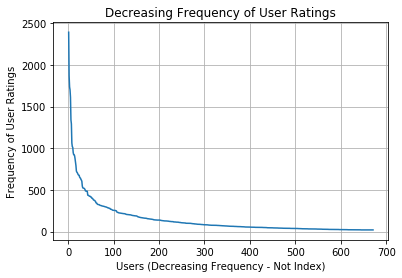

In [95]:
ind_sorted_user = np.flipud(np.argsort(user_ratings_freq,axis=None).T)
user_ratings_freq_sort = user_ratings_freq[ind_sorted_user]
plt.plot(userId,user_ratings_freq_sort)
plt.title('Decreasing Frequency of User Ratings')
plt.xlabel('Users (Decreasing Frequency - Not Index)')
plt.ylabel('Frequency of User Ratings')
plt.grid()
plt.show()

### Question 5
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process. 
#### Answer
In Question 3, we can see a very small percentage of the movies have the vast majority of the ratings. That is, very few movies have a lot of ratings and the rest have very few. The implications of this will make it difficult to recommend  a majority of the movies that have very few ratings compared to the few that have many. 